In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [6]:
comm = pd.read_csv("C:/Users/and99/Downloads/composizione_commissioni_data.csv")

In [7]:
comm

,senatore,nome,cognome,inizioAfferenza,carica,commissione,titolo
0,http://dati.senato.it/senatore/17542,Alberto,Balboni,2022-11-10,Presidente,http://dati.senato.it/commissione/0-1,1ª Commissione permanente
1,http://dati.senato.it/senatore/3900,Marcello,Pera,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1ª Commissione permanente
2,http://dati.senato.it/senatore/18562,Daisy,Pirovano,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1ª Commissione permanente
3,http://dati.senato.it/senatore/29490,Marco,Meloni,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1ª Commissione permanente
4,http://dati.senato.it/senatore/22918,Peppe,De Cristofaro,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1ª Commissione permanente
...,...,...,...,...,...,...,...
358,http://dati.senato.it/senatore/36387,Andrea,Crisanti,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,Delegazione parlamentare italiana presso l'Ass...
359,http://dati.senato.it/senatore/36396,Marco,Dreosto,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,Delegazione parlamentare italiana presso l'Ass...
360,http://dati.senato.it/senatore/36408,Ester,Mieli,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,Delegazione parlamentare italiana presso l'Ass...
361,http://dati.senato.it/senatore/33863,Marco,Scurria,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,Delegazione parlamentare italiana presso l'Ass...


In [10]:
le = LabelEncoder().fit(comm['senatore'])
comm['id'] = le.transform(comm['senatore'])

In [ ]:
le = LabelEncoder().fit(comm['titolo'])
comm['titolo'] = le.transform(comm['titolo'])

In [15]:
comm

,senatore,nome,cognome,inizioAfferenza,carica,commissione,titolo,id
0,http://dati.senato.it/senatore/17542,Alberto,Balboni,2022-11-10,Presidente,http://dati.senato.it/commissione/0-1,1,7
1,http://dati.senato.it/senatore/3900,Marcello,Pera,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,199
2,http://dati.senato.it/senatore/18562,Daisy,Pirovano,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,12
3,http://dati.senato.it/senatore/29490,Marco,Meloni,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,57
4,http://dati.senato.it/senatore/22918,Peppe,De Cristofaro,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,21
...,...,...,...,...,...,...,...,...
358,http://dati.senato.it/senatore/36387,Andrea,Crisanti,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,134
359,http://dati.senato.it/senatore/36396,Marco,Dreosto,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,143
360,http://dati.senato.it/senatore/36408,Ester,Mieli,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,155
361,http://dati.senato.it/senatore/33863,Marco,Scurria,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,122


In [34]:
np.unique(comm['id'], return_counts= True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [16]:
import networkx as nx
from networkx.algorithms import bipartite

In [17]:
G = nx.Graph()
G.add_nodes_from(comm['id'], bipartite  = 0)
G.add_nodes_from(comm['titolo'], bipartite = 1)

In [25]:
a = []
for i in range(comm.shape[0]):
    a.append((comm['id'][i], comm['titolo'][i]))

In [26]:
G.add_edges_from(a)

In [28]:
G.edges6

EdgeView([(7, 1), (7, 19), (7, 154), (7, 41), (7, 64), (7, 72), (7, 74), (7, 76), (7, 79), (7, 87), (7, 56), (7, 100), (7, 107), (7, 128), (7, 109), (7, 134), (7, 70), (7, 2), (7, 186), (7, 37), (7, 160), (7, 124), (7, 164), (7, 165), (7, 175), (7, 115), (7, 10), (199, 1), (199, 15), (12, 1), (12, 16), (12, 187), (12, 12), (12, 8), (12, 58), (12, 123), (12, 117), (12, 53), (12, 115), (12, 17), (57, 1), (21, 1), (21, 14), (21, 17), (67, 1), (83, 1), (83, 19), (83, 10), (11, 1), (11, 15), (11, 101), (11, 118), (11, 51), (11, 170), (91, 1), (91, 17), (58, 1), (58, 20), (60, 1), (142, 1), (142, 19), (142, 10), (194, 1), (194, 17), (23, 1), (23, 14), (49, 1), (49, 5), (49, 17), (117, 1), (140, 1), (140, 8), (53, 1), (53, 20), (182, 1), (182, 14), (160, 1), (174, 1), (174, 19), (174, 10), (13, 1), (13, 144), (198, 1), (198, 16), (187, 4), (132, 4), (132, 14), (202, 4), (16, 4), (16, 19), (16, 41), (16, 72), (16, 75), (16, 81), (16, 181), (16, 55), (16, 100), (16, 156), (16, 109), (16, 152), 

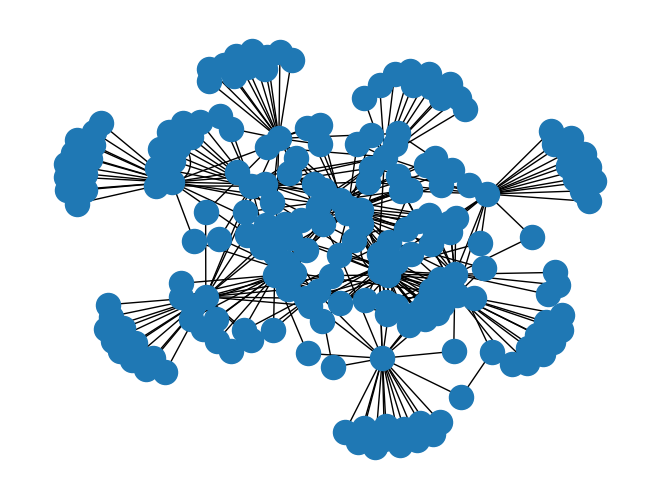

In [32]:
nx.draw(G)